___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

 **WELCOME!**

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

**TASKS**

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

# Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

## Import Libraries

In [768]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# !pip install skimpy
from skimpy import clean_columns
import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
# pd.set_option('display.float_format', lambda x: f'{x:.3f}')
# pd.set_option('display.float_format', lambda x: '%.4f'%x)
# pd.options.display.float_format = '{:.4f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [769]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("whitegrid")

params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

## Load Dataset

In [770]:
pd.read_csv("Mall_Customers.csv")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [771]:
df_origin = pd.read_csv('Mall_Customers.csv',index_col='CustomerID')
df = df_origin.copy()
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## Edit columns

In [772]:
from skimpy import clean_columns

In [773]:
df = (clean_columns(df))
df.head()

,gender,age,annual_income_k_$,spending_score_1_100
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [774]:
# df.columns = pd.Series(clean_columns(df).columns).str.replace(r'.\(.*\)',"",regex=True)

# Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [775]:
df.head()

,gender,age,annual_income_k_$,spending_score_1_100
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [776]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   gender                200 non-null    object
 1   age                   200 non-null    int64 
 2   annual_income_k_$     200 non-null    int64 
 3   spending_score_1_100  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [777]:
df.duplicated().sum()

0

In [778]:
(df.isna().mean()*100)

gender                  0.0
age                     0.0
annual_income_k_$       0.0
spending_score_1_100    0.0
dtype: float64

In [779]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income_k_$,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score_1_100,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


When looking at the mean and std values, we can say that there is no outlier values.

In [780]:
df.describe(include='O').T

,count,unique,top,freq
gender,200,2,Female,112


In [781]:
# df.describe().T.style.background_gradient(cmap='PiYG_r', axis=1)

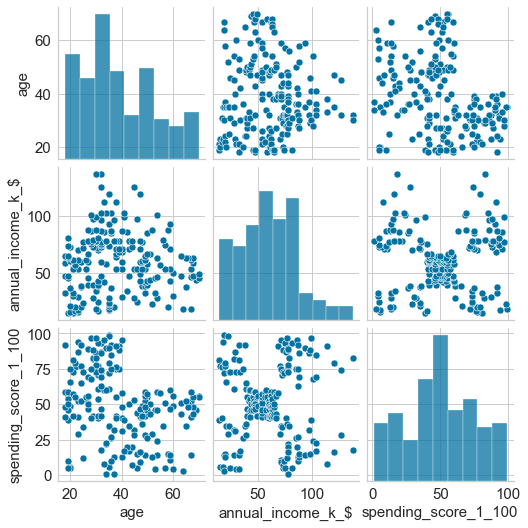

In [782]:
sns.pairplot(df);

When the chart above is examined, it is seen that it can be divided into 5 clusters according to annual_income(k_$) and spending_score(1_100) features. It is also possible to cluster according to spending_score(1_100) and age features.

KeyError: 'annual_income(k_$)'

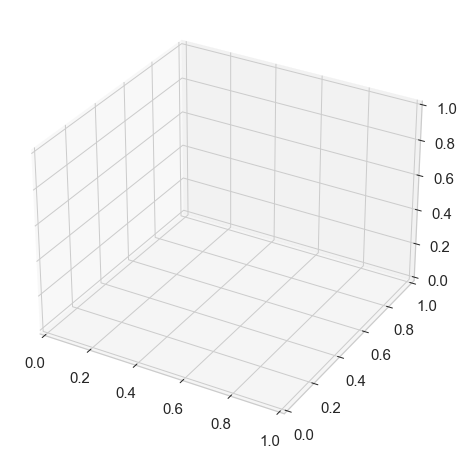

In [783]:
# Let's look at the data with 3D plottings
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['age'], df['annual_income(k_$)'], df['spending_score(1_100)'], 
    c=df['gender'].astype("category").cat.codes, cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income(k_$)')
ax.set_zlabel('Spending Score(1_100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('(mm)', size=8)
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['gender'].astype("category").cat.codes, df['annual_income_k_$'], df['spending_score_1_100'], 
    c=df['age'], cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income(k_$)')
ax.set_zlabel('Spending Score(1_100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('(mm)', size=8)
plt.show()

In [ ]:
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt
# # Import libraries
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt
# # Creating figure
# fig = plt.figure(figsize = (16, 9))
# ax = plt.axes(projection ="3d")
# # Add x, y gridlines
# ax.grid(b = True, color ='grey',
#         linestyle ='-.', linewidth = 0.3,
#         alpha = 0.2)
# # Creating color map
# my_cmap = plt.get_cmap('hsv')
# # Creating plot
# sctt = ax.scatter3D(df["age"], df["annual_income(k_$)"], df["spending_score(1_100)"],
#                     alpha = 0.8,
#                     c = (df["age"] + df["annual_income(k_$)"]+ df["spending_score(1_100)"]),
#                     cmap = my_cmap,
#                     marker ='^')
# plt.title("simple 3D scatter plot")
# ax.set_xlabel('Age', fontweight ='bold')
# ax.set_ylabel('Annual Income', fontweight ='bold')
# ax.set_zlabel('Spending Score', fontweight ='bold')
# fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# # show plot
# plt.show()

Let's examine the descriptive statistics:

In [ ]:
df.corr()

In [ ]:
# multiolinarity
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

In [ ]:
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 20, "rotation":0},square=True)
plt.xticks(rotation=90) 
plt.yticks(rotation=0) 
plt.show()

---
---

# K-Means Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## Clustering based on Age and Spending Score (modelling without scaling)

###  Create a new dataset with two variables of your choice* 

In [ ]:
X = df.iloc[:,[1,3]]
X.head()

In [ ]:
X.shape

In [ ]:
from sklearn.cluster import KMeans
# modelling as default
K_means_model = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, 
                       tol=0.0001, verbose=0, random_state=42)

In [ ]:
K_means_model.fit_predict(X)

In [ ]:
clusters = K_means_model.labels_
clusters 
np.array(np.unique(clusters, return_counts=True)).T

In [ ]:
X["Classes"] = K_means_model.labels_
X["Classes"].value_counts().sort_index()

In [784]:
X.head()

,annual_income_k_$,spending_score_1_100,predicted_clusters,labels
CustomerID,,,,
1,-1.738999,-0.434801,2,low_income_low_spending
2,-1.738999,1.195704,3,low_income_high_spending
3,-1.700830,-1.715913,2,low_income_low_spending
4,-1.700830,1.040418,3,low_income_high_spending
5,-1.662660,-0.395980,2,low_income_low_spending


In [785]:
K_means_model.cluster_centers_ 

array([[-1.35185213, -1.19089759],
       [ 0.03367718, -0.08242116],
       [ 0.75632724,  1.27092084],
       [-1.35921337,  1.19570407],
       [ 0.73088095, -1.39401754],
       [ 1.87564575, -1.09476801],
       [-0.62198207,  0.04247535],
       [ 2.06703817,  1.0958772 ]])

In [786]:
K_means_model.inertia_

37.73640346254162

In [787]:
K_means_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

### Hopkins test

In [788]:
from pyclustertend import hopkins

X = X.drop("Classes", axis =1)

hopkins(X, X.shape[0]), hopkins(X, X.shape[0]//2)

KeyError: "['Classes'] not found in axis"

### Determine optimal number of clusters*

##### Elbow metod

In [789]:
ssd = []  # sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

ValueError: could not convert string to float: 'low_income_low_spending'

In [790]:
ssd 

[]

In [791]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0


IndexError: index 0 is out of bounds for axis 0 with size 0

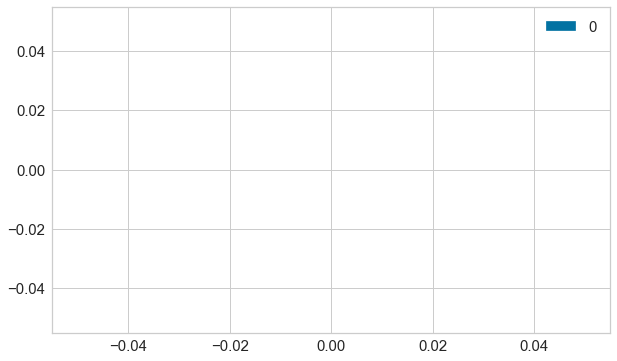

In [792]:
g = df_diff.round(2).plot.barh(rot=0, figsize=(10,6))
g.bar_label(g.containers[0], fontsize=14, weight='bold', color='k', padding=4)
g.invert_yaxis()
plt.show();

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")
plt.show()

In [793]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

ValueError: could not convert string to float: 'low_income_low_spending'

### Silhouette analysis

**Why silhouette_score is negative?**

![image.png](attachment:image.png)

In [794]:
from sklearn.metrics import silhouette_score

In [795]:
silhouette_score(X, K_means_model.labels_)

ValueError: could not convert string to float: 'low_income_low_spending'

In [796]:
for k in K:
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")
    
# The closer it is to 1, the more suitable for clustering.
# Distance within and between clusters
# Since 4 has a higher score, we choose 4 (higher than default number of clusters, 8) and we make our decision clear.

ValueError: could not convert string to float: 'low_income_low_spending'

In [797]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

ValueError: could not convert string to float: 'low_income_low_spending'

###  Apply K Means*: Building the model based on the optimal number of clusters

In [798]:
kmeans_model = KMeans(n_clusters =4, random_state=42)
kmeans_model.fit_predict(X)  

ValueError: could not convert string to float: 'low_income_low_spending'

### *iv. Visualizing and Labeling All the Clusters*

In [799]:
kmeans_model.labels_

AttributeError: 'KMeans' object has no attribute 'labels_'

In [800]:
kmeans_model.cluster_centers_

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [801]:
X["predicted_clusters"] = kmeans_model.labels_
X["predicted_clusters"].value_counts().sort_index()

AttributeError: 'KMeans' object has no attribute 'labels_'

In [802]:
X.head()

,annual_income_k_$,spending_score_1_100,predicted_clusters,labels
CustomerID,,,,
1,-1.738999,-0.434801,2,low_income_low_spending
2,-1.738999,1.195704,3,low_income_high_spending
3,-1.700830,-1.715913,2,low_income_low_spending
4,-1.700830,1.040418,3,low_income_high_spending
5,-1.662660,-0.395980,2,low_income_low_spending


In [803]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X.iloc[kmeans_model.labels_ == 0, 0], X.iloc[kmeans_model.labels_ == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 1, 0], X.iloc[kmeans_model.labels_ == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 2, 0], X.iloc[kmeans_model.labels_ == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 3, 0], X.iloc[kmeans_model.labels_ == 3, 1], color = 'grey', label = 'Cluster 4',s=50)

sns.scatterplot(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

AttributeError: 'KMeans' object has no attribute 'labels_'

<Figure size 1080x504 with 0 Axes>

In [804]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["age"], X["spending_score_1_100"], hue= X["predicted_clusters"], palette= "viridis")
plt.legend(loc="center right", bbox_to_anchor=(1.1,0.5))
plt.show();

KeyError: 'age'

<Figure size 720x360 with 0 Axes>

In [805]:
plt.figure(figsize=(10,5))

sns.scatterplot(
    x="age", y="spending_score_1_100", 
    data=X, 
    hue= "predicted_clusters", 
    palette= "viridis", 
    label='predicted_clusters'
)
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='s', c="r", label='Centroids')
plt.legend(loc="center right", bbox_to_anchor=(1.25, 0.5))
plt.show();

ValueError: Could not interpret value `age` for parameter `x`

<Figure size 720x360 with 0 Axes>

In [806]:
clus_pred = X.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2,3,4
annual_income_k_$,-0.200913,1.055003,-1.307519,-1.329545,0.991583
spending_score_1_100,-0.026456,-1.284439,-1.136965,1.132178,1.239503


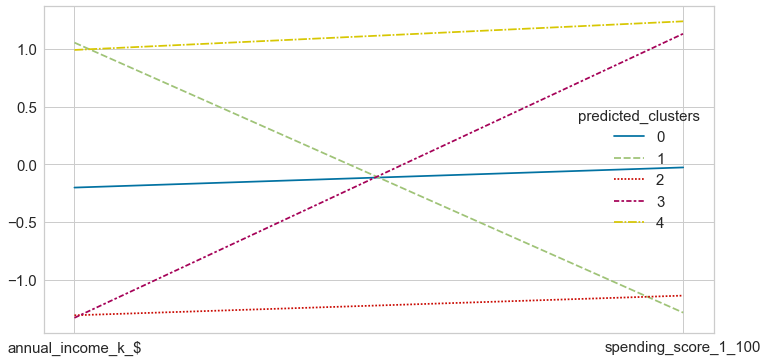

In [807]:
sns.lineplot(data=clus_pred)
plt.show();

## Clustering based  on Annual Income and Spending Score (modelling without scaling)

###  Create a new dataset with two variables of your choice* 

In [808]:
X = df.iloc[:,[2,3]]
X.head()

,annual_income_k_$,spending_score_1_100
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [809]:
X.shape

(200, 2)

In [810]:
from sklearn.cluster import KMeans
# modelling as default
K_means_model = KMeans(random_state=42)

In [811]:
K_means_model.fit_predict(X)

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 6, 1, 1, 1, 1, 1,
       1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 2, 6, 2, 0, 2, 0, 2,
       6, 2, 0, 2, 0, 2, 0, 2, 0, 2, 6, 2, 0, 2, 6, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 6, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7])

In [812]:
clusters = K_means_model.labels_
clusters 
np.array(np.unique(clusters, return_counts=True)).T

array([[ 0, 22],
       [ 1, 44],
       [ 2, 29],
       [ 3, 22],
       [ 4, 21],
       [ 5, 10],
       [ 6, 42],
       [ 7, 10]], dtype=int64)

In [813]:
X["Classes"] = K_means_model.labels_
X["Classes"].value_counts().sort_index()

0    22
1    44
2    29
3    22
4    21
5    10
6    42
7    10
Name: Classes, dtype: int64

In [814]:
X.head()

,annual_income_k_$,spending_score_1_100,Classes
CustomerID,,,
1,15,39,3
2,15,81,4
3,16,6,3
4,16,77,4
5,17,40,3


In [815]:
K_means_model.cluster_centers_ 

array([[ 80.18181818,  12.68181818],
       [ 47.65909091,  51.61363636],
       [ 78.55172414,  82.17241379],
       [ 25.72727273,  20.22727273],
       [ 25.0952381 ,  80.04761905],
       [109.7       ,  22.        ],
       [ 63.95238095,  46.21428571],
       [109.7       ,  82.        ]])

In [816]:
K_means_model.inertia_

25011.839349156595

In [817]:
K_means_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

### Hopkins test

In [818]:
from pyclustertend import hopkins

X = X.drop("Classes", axis =1)

hopkins(X, X.shape[0]), hopkins(X, X.shape[0]//2)

(0.30305641471918043, 0.29916443871807036)

### Determine optimal number of clusters*

##### Elbow metod

In [819]:
ssd = []  # sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

In [820]:
ssd 

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21850.165282585636]

In [821]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.222897
3,32668.584023
4,29231.333592
5,7214.640937
6,6974.157303
7,5247.817858
8,3161.674067


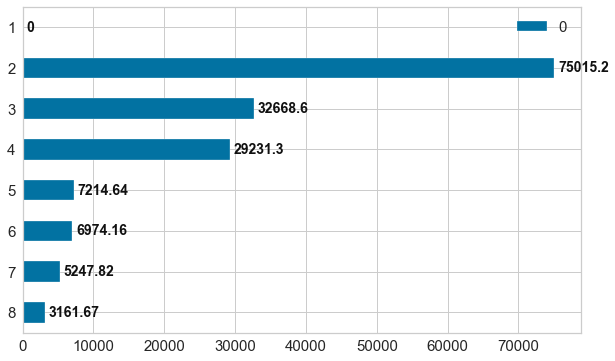

In [822]:
g = df_diff.round(2).plot.barh(rot=0, figsize=(10,6))
g.bar_label(g.containers[0], fontsize=14, weight='bold', color='k', padding=4)
g.invert_yaxis()
plt.show();

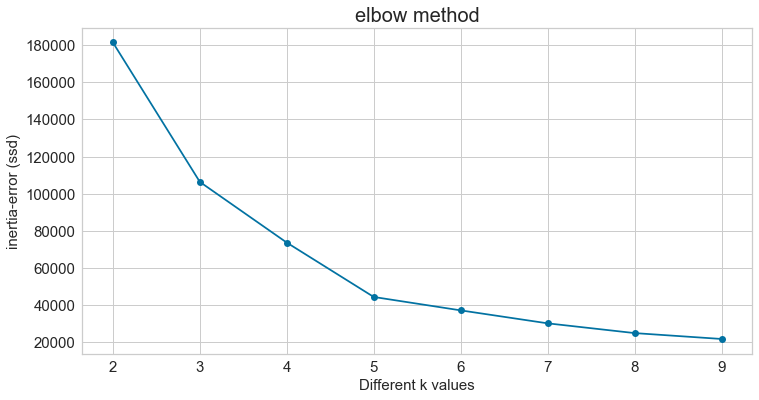

In [823]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")
plt.show()

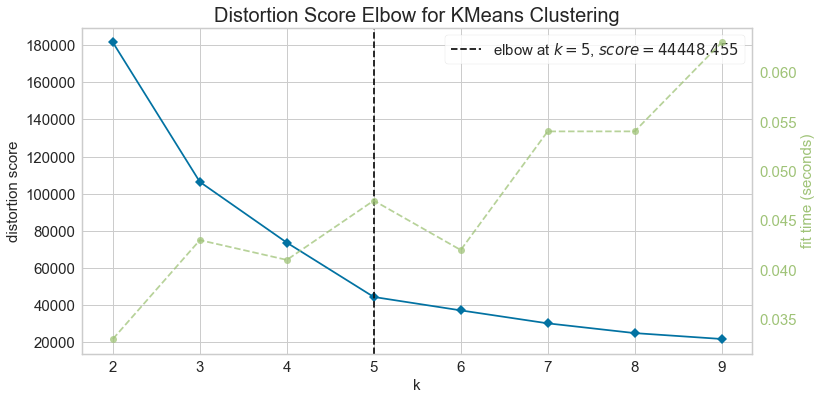

In [824]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

### Silhouette analysis

In [825]:
from sklearn.metrics import silhouette_score

In [826]:
silhouette_score(X, K_means_model.labels_)

0.45827056882053113

In [827]:
for k in K:
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")
    
# The closer it is to 1, the more suitable for clustering.
# Distance within and between clusters
# Since 5 has a higher score, we choose 5 (higher than default number of clusters, 8) and we make our decision clear.

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4565077334305076


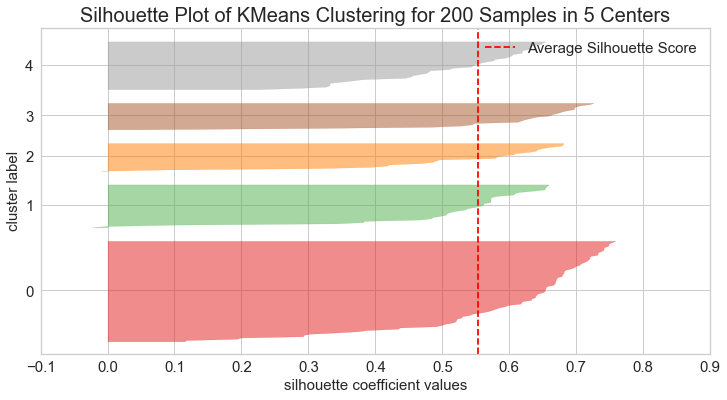

In [828]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

###  Apply K Means*: Building the model based on the optimal number of clusters

In [829]:
kmeans_model = KMeans(n_clusters =5, random_state=42)
kmeans_model.fit_predict(X)  

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

### *iv. Visualizing and Labeling All the Clusters*

In [830]:
kmeans_model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [831]:
kmeans_model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [832]:
X["predicted_clusters"] = kmeans_model.labels_
X["predicted_clusters"].value_counts().sort_index()

0    81
1    35
2    23
3    22
4    39
Name: predicted_clusters, dtype: int64

In [833]:
X.head()

,annual_income_k_$,spending_score_1_100,predicted_clusters
CustomerID,,,
1,15,39,2
2,15,81,3
3,16,6,2
4,16,77,3
5,17,40,2


In [834]:

X.columns

Index(['annual_income_k_$', 'spending_score_1_100', 'predicted_clusters'], dtype='object')

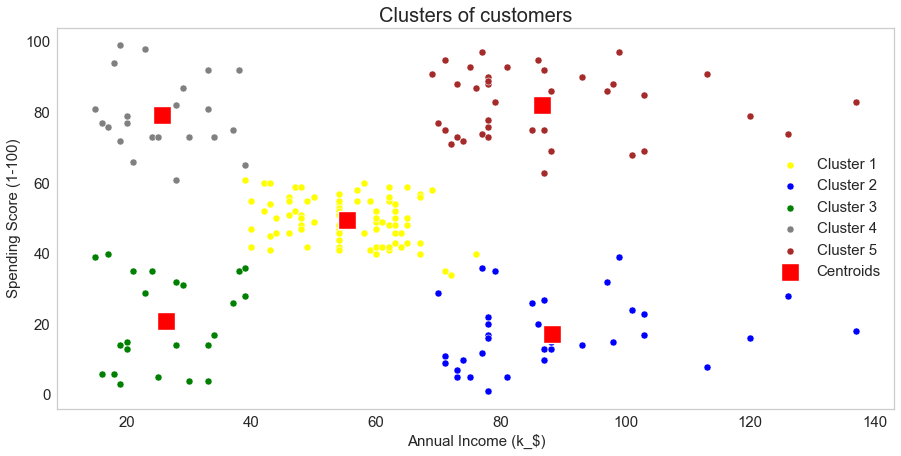

In [835]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X.iloc[kmeans_model.labels_ == 0, 0], X.iloc[kmeans_model.labels_ == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 1, 0], X.iloc[kmeans_model.labels_ == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 2, 0], X.iloc[kmeans_model.labels_ == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 3, 0], X.iloc[kmeans_model.labels_ == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 4, 0], X.iloc[kmeans_model.labels_ == 4, 1], color = 'brown', label = 'Cluster 5',s=50)

sns.scatterplot(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k_$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

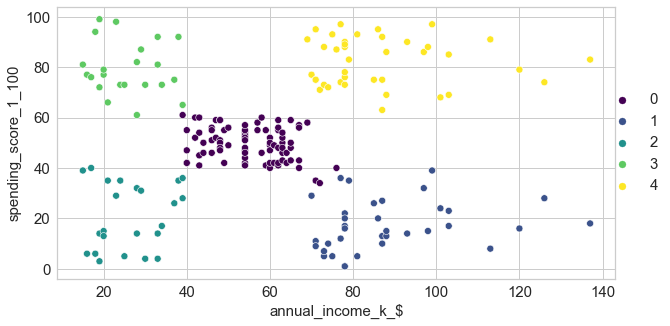

In [836]:
plt.figure(figsize=(10,5))
sns.scatterplot(X['annual_income_k_$'], X["spending_score_1_100"], hue= X["predicted_clusters"], palette= "viridis")
plt.legend(loc="center right", bbox_to_anchor=(1.1,0.5))
plt.show();

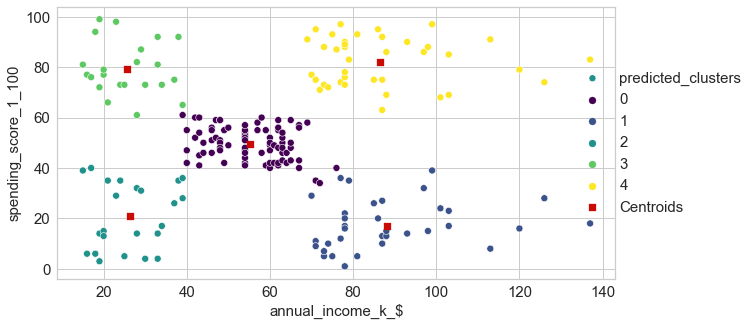

In [837]:
plt.figure(figsize=(10,5))

sns.scatterplot(
    x='annual_income_k_$', y="spending_score_1_100", 
    data=X, 
    hue= "predicted_clusters", 
    palette= "viridis", 
    label='predicted_clusters'
)
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='s', c="r", label='Centroids')
plt.legend(loc="center right", bbox_to_anchor=(1.25, 0.5))
plt.show();

In [838]:
clus_pred = X.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2,3,4
annual_income_k_$,55.296296,88.200000,26.304348,25.727273,86.538462
spending_score_1_100,49.518519,17.114286,20.913043,79.363636,82.128205


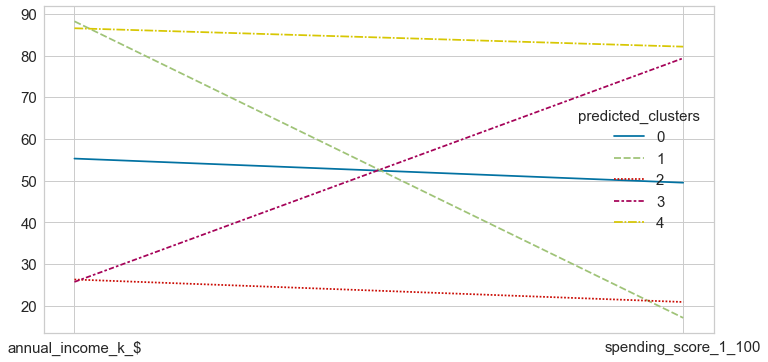

In [839]:
sns.lineplot(data=clus_pred)
plt.show();

> As a result of K-means cluster analysis, when we examine the scatter plot and line plots, we see that the 'annual_income(k_$)' and 'spending_score(1_100)' features make a much better grouping. Therefore, we can determine the labeling according to these two features as follows:

In [840]:
X["labels"] = X['predicted_clusters'].map({
    0:"medium_income_medium_spending",
    1:"high_income_low_spending",
    2:"low_income_low_spending",
    3:"low_income_high_spending",
    4:"high_income_high_spending"
})
X

,annual_income_k_$,spending_score_1_100,predicted_clusters,labels
CustomerID,,,,
1,15,39,2,low_income_low_spending
2,15,81,3,low_income_high_spending
3,16,6,2,low_income_low_spending
4,16,77,3,low_income_high_spending
5,17,40,2,low_income_low_spending
...,...,...,...,...
196,120,79,4,high_income_high_spending
197,126,28,1,high_income_low_spending
198,126,74,4,high_income_high_spending


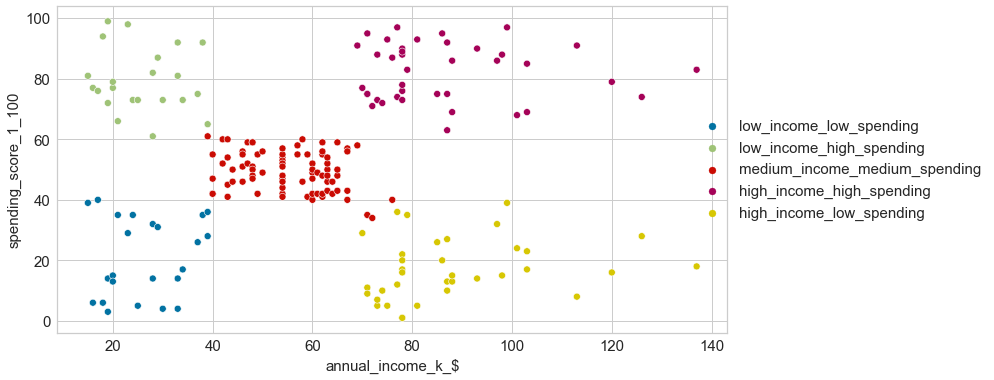

In [841]:
sns.scatterplot(data=X, x="annual_income_k_$", y="spending_score_1_100", hue="labels")
plt.legend(loc="center right", bbox_to_anchor=(1.4,0.5))
plt.show()

In the first part, we obtained the results without applying any scaling operation to the data. Now let's analyze the clustering as a result of the scaling process:

## Scaling Data

In [842]:
df_not_scaled = df.copy()
df_not_scaled.head()

,gender,age,annual_income_k_$,spending_score_1_100
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [843]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler,normalize

In [844]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

counter = 1
scalers = [MinMaxScaler(),StandardScaler(), RobustScaler()]
scal_str = ["MinMaxScaling","StandardScaling", "RobustScaling" ]
for i in scalers:
    numbers = df.select_dtypes(include='number').columns
    df[numbers] = scaler.fit_transform(df[numbers])
    df
    print(f"{scal_str[counter-1]}: {hopkins(i.fit_transform(df[numbers]), df[numbers].shape[0])}")
    
    print(f"{scal_str[counter-1]} for [1,3]: {hopkins(i.fit_transform(df.iloc[:,[1,3]]), df.iloc[:,[1,3]].shape[0])}")
    print(f"{scal_str[counter-1]} for [2,3]: {hopkins(i.fit_transform(df.iloc[:,[2,3]]), df.iloc[:,[2,3]].shape[0])}")
    counter += 1
    print("\n")

MinMaxScaling: 0.32654020874772116
MinMaxScaling for [1,3]: 0.36832811805105176
MinMaxScaling for [2,3]: 0.32271247277040577


StandardScaling: 0.3108603899494517
StandardScaling for [1,3]: 0.28719539219156537
StandardScaling for [2,3]: 0.29716398977681985


RobustScaling: 0.3092261679583088
RobustScaling for [1,3]: 0.3024168932405457
RobustScaling for [2,3]: 0.291917605642742




According to the results above, we will use the standard scaler as it gives the best clustering tendency.

In [845]:
# scaled df
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

numbers = df.select_dtypes(include='number').columns
df[numbers] = scaler.fit_transform(df[numbers])
df_scaled = df.copy()
df_scaled

,gender,age,annual_income_k_$,spending_score_1_100
CustomerID,,,,
1,Male,-1.424569,-1.738999,-0.434801
2,Male,-1.281035,-1.738999,1.195704
3,Female,-1.352802,-1.700830,-1.715913
4,Female,-1.137502,-1.700830,1.040418
5,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061
197,Female,0.441365,2.497807,-0.861839
198,Male,-0.491602,2.497807,0.923953


## Clustering based on Age and Spending Score (modelling with scaling and normalizing)

###  Create a new dataset with two variables of your choice* 

In [846]:
X = df_scaled.iloc[:,[1,3]]
X.head()

,age,spending_score_1_100
CustomerID,,
1,-1.424569,-0.434801
2,-1.281035,1.195704
3,-1.352802,-1.715913
4,-1.137502,1.040418
5,-0.563369,-0.395980


In [847]:
X.shape

(200, 2)

In [848]:
from sklearn.cluster import KMeans
# modelling as default
K_means_model = KMeans(random_state=42)

In [849]:
K_means_model.fit_predict(X)

array([2, 5, 3, 5, 2, 5, 6, 0, 1, 5, 1, 0, 1, 5, 6, 5, 6, 5, 1, 0, 6, 5,
       1, 5, 1, 5, 7, 5, 6, 5, 1, 5, 1, 5, 1, 5, 6, 5, 6, 5, 4, 0, 7, 5,
       1, 5, 7, 2, 2, 2, 7, 5, 2, 4, 7, 7, 7, 4, 2, 7, 4, 2, 4, 7, 4, 2,
       7, 4, 2, 2, 4, 7, 4, 4, 4, 2, 7, 7, 2, 7, 4, 7, 4, 7, 2, 7, 7, 2,
       5, 7, 4, 2, 7, 7, 2, 2, 7, 2, 7, 2, 2, 7, 4, 2, 7, 2, 4, 7, 4, 4,
       4, 2, 7, 2, 2, 2, 4, 7, 7, 7, 2, 7, 7, 0, 3, 5, 7, 0, 1, 0, 1, 0,
       2, 5, 3, 0, 6, 5, 3, 5, 1, 0, 2, 0, 3, 0, 7, 5, 6, 0, 6, 0, 6, 0,
       1, 0, 6, 5, 6, 5, 1, 0, 3, 0, 1, 0, 6, 0, 6, 5, 6, 5, 6, 0, 1, 0,
       1, 5, 1, 0, 6, 0, 1, 0, 7, 0, 1, 5, 6, 0, 6, 5, 6, 0, 1, 0, 6, 5,
       6, 0])

In [850]:
clusters = K_means_model.labels_
clusters 
np.array(np.unique(clusters, return_counts=True)).T

array([[ 0, 30],
       [ 1, 22],
       [ 2, 30],
       [ 3,  6],
       [ 4, 20],
       [ 5, 34],
       [ 6, 23],
       [ 7, 35]], dtype=int64)

In [851]:
X["Classes"] = K_means_model.labels_
X["Classes"].value_counts().sort_index()

0    30
1    22
2    30
3     6
4    20
5    34
6    23
7    35
Name: Classes, dtype: int64

In [852]:
X

,age,spending_score_1_100,Classes
CustomerID,,,
1,-1.424569,-0.434801,2
2,-1.281035,1.195704,5
3,-1.352802,-1.715913,3
4,-1.137502,1.040418,5
5,-0.563369,-0.395980,2
...,...,...,...
196,-0.276302,1.118061,0
197,0.441365,-0.861839,6
198,-0.491602,0.923953,5


In [853]:
K_means_model.cluster_centers_ 

array([[-0.41505069,  1.48039552],
       [ 1.07421686, -1.36828355],
       [-1.06334312, -0.06858476],
       [-1.28103541, -1.51533492],
       [ 1.86593393, -0.01358755],
       [-0.81033036,  0.88284796],
       [-0.06724227, -1.22811163],
       [ 0.57669661, -0.13310249]])

In [854]:
K_means_model.inertia_

39.305873251926876

In [855]:
K_means_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

### Hopkins test

In [856]:
from pyclustertend import hopkins

X = X.drop("Classes", axis =1)

hopkins(X, X.shape[0]), hopkins(X, X.shape[0]//2)

(0.2991028538148783, 0.3446134765430264)

### Determine optimal number of clusters*

##### Elbow metod

In [857]:
ssd = []  # sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

In [858]:
ssd 

[189.3874903399243,
 124.3262861792153,
 89.76521676586152,
 71.29556592219441,
 53.17373745380917,
 46.44628500949164,
 39.305873251926876,
 33.83644725407147]

In [859]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,65.061204
3,34.561069
4,18.469651
5,18.121828
6,6.727452
7,7.140412
8,5.469426


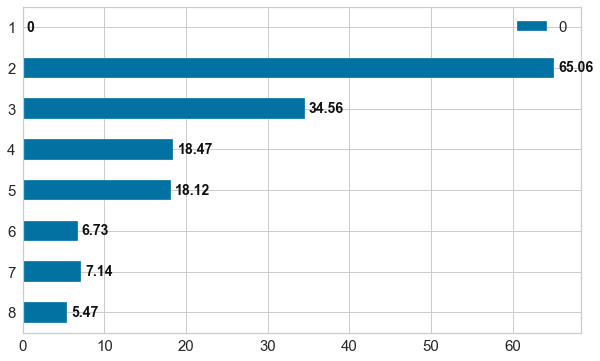

In [860]:
g = df_diff.round(2).plot.barh(rot=0, figsize=(10,6))
g.bar_label(g.containers[0], fontsize=14, weight='bold', color='k', padding=4)
g.invert_yaxis()
plt.show();

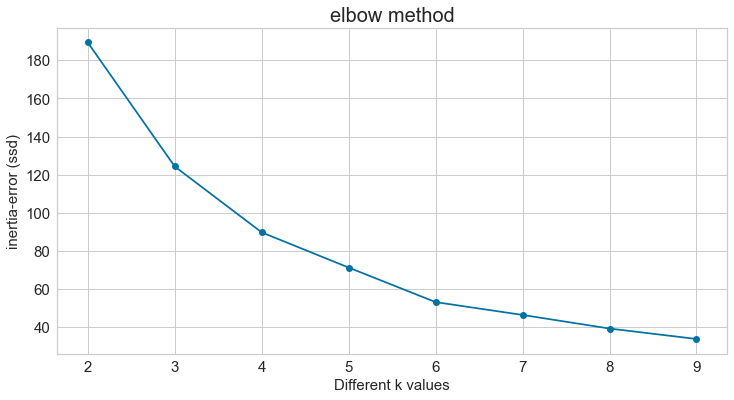

In [861]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")
plt.show()

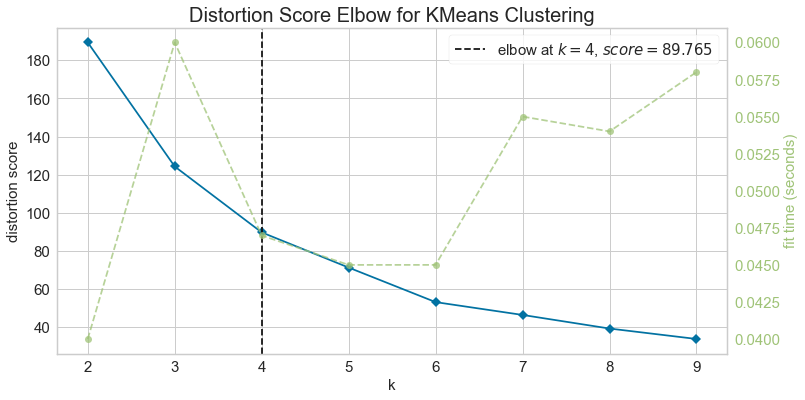

In [862]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

### Silhouette analysis

In [863]:
from sklearn.metrics import silhouette_score

In [864]:
silhouette_score(X, K_means_model.labels_)

0.41387412991922595

In [865]:
K = range(2,10)
for k in K:
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643059896
For n_clusters=3, the silhouette score is 0.4395299000217561
For n_clusters=4, the silhouette score is 0.43838608465410983
For n_clusters=5, the silhouette score is 0.4475485887863007
For n_clusters=6, the silhouette score is 0.45316371328410243
For n_clusters=7, the silhouette score is 0.40053964469516656
For n_clusters=8, the silhouette score is 0.41387412991922595
For n_clusters=9, the silhouette score is 0.4230225674962596


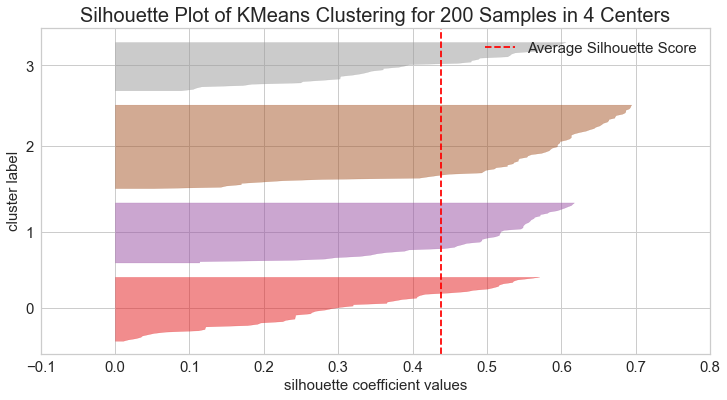

In [866]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

###  Apply K Means*: Building the model based on the optimal number of clusters

In [867]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters =4, random_state=42)
kmeans_model.fit_predict(X)  

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2])

### *iv. Visualizing and Labeling All the Clusters*

In [868]:
kmeans_model.labels_

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2])

In [869]:
kmeans_model.cluster_centers_

array([[-0.8346466 , -0.39442706],
       [ 1.22927178, -0.06558366],
       [-0.61415725,  1.14971545],
       [ 0.62833625, -1.36651894]])

In [870]:
X["predicted_clusters"] = kmeans_model.labels_
X["predicted_clusters"].value_counts()

2    65
0    50
1    47
3    38
Name: predicted_clusters, dtype: int64

In [871]:
X.head()

,age,spending_score_1_100,predicted_clusters
CustomerID,,,
1,-1.424569,-0.434801,0
2,-1.281035,1.195704,2
3,-1.352802,-1.715913,0
4,-1.137502,1.040418,2
5,-0.563369,-0.395980,0


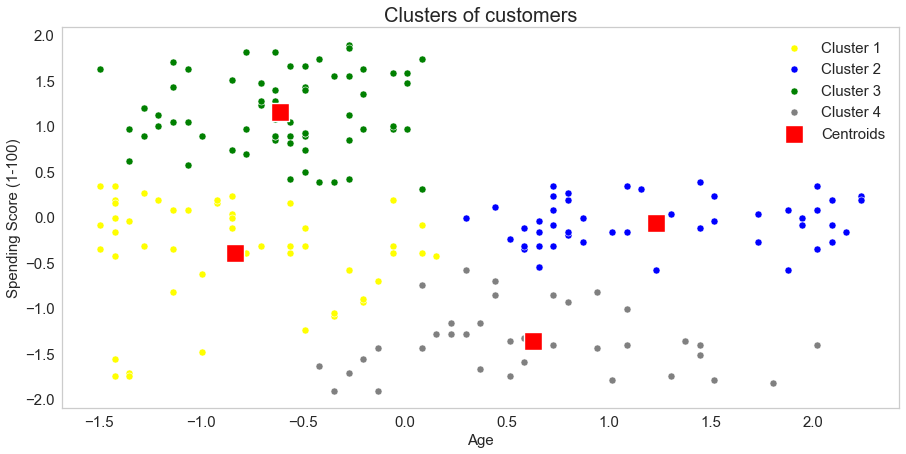

In [872]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X.iloc[kmeans_model.labels_ == 0, 0], X.iloc[kmeans_model.labels_ == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 1, 0], X.iloc[kmeans_model.labels_ == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 2, 0], X.iloc[kmeans_model.labels_ == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 3, 0], X.iloc[kmeans_model.labels_ == 3, 1], color = 'grey', label = 'Cluster 4',s=50)

sns.scatterplot(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [873]:
# plt.figure(figsize=(10,5))
# sns.scatterplot(X["age"], X["spending_score_1_100"], hue= X["predicted_clusters"], palette= "viridis")
# plt.legend(loc="center right", bbox_to_anchor=(1.1,0.5))
# plt.show();

In [874]:
# plt.figure(figsize=(10,5))

# sns.scatterplot(
#     x="age", y="spending_score_1_100", 
#     data=X, 
#     hue= "predicted_clusters", 
#     palette= "viridis", 
#     label='predicted_clusters'
# )
# plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='s', c="r", label='Centroids')
# plt.legend(loc="center right", bbox_to_anchor=(1.25, 0.5))
# plt.show();

In [875]:
clus_pred = X.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2,3
age,-0.834647,1.229272,-0.614157,0.628336
spending_score_1_100,-0.394427,-0.065584,1.149715,-1.366519


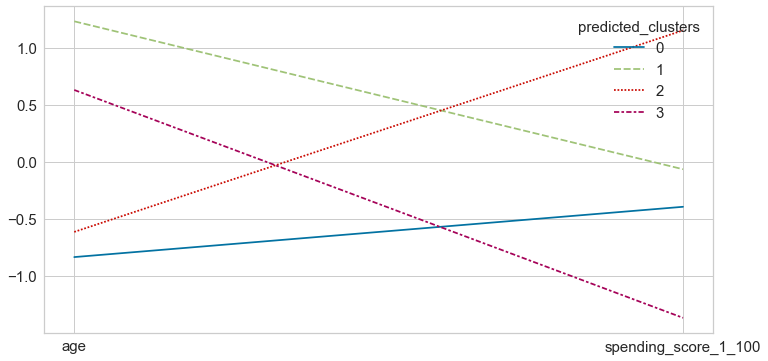

In [876]:
sns.lineplot(data=clus_pred)
plt.show();

## Clustering based  on Annual Income and Spending Score (modelling with scaling)

###  Create a new dataset with two variables of your choice* 

In [877]:
X = df_scaled.iloc[:,[2,3]]
X.head()

,annual_income_k_$,spending_score_1_100
CustomerID,,
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980


In [878]:
X.shape

(200, 2)

In [879]:
from sklearn.cluster import KMeans
# modelling as default
K_means_model = KMeans(random_state=42)

In [880]:
K_means_model.fit_predict(X)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 6, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 6, 3, 6, 6,
       0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 5, 2, 5, 2, 5, 2, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7])

In [881]:
clusters = K_means_model.labels_
clusters 
np.array(np.unique(clusters, return_counts=True)).T

array([[ 0, 21],
       [ 1, 52],
       [ 2, 32],
       [ 3, 20],
       [ 4, 24],
       [ 5, 10],
       [ 6, 34],
       [ 7,  7]], dtype=int64)

In [882]:
X["Classes"] = K_means_model.labels_
X["Classes"].value_counts().sort_index()

0    21
1    52
2    32
3    20
4    24
5    10
6    34
7     7
Name: Classes, dtype: int64

In [883]:
X.head()

,annual_income_k_$,spending_score_1_100,Classes
CustomerID,,,
1,-1.738999,-0.434801,0
2,-1.738999,1.195704,3
3,-1.700830,-1.715913,0
4,-1.700830,1.040418,3
5,-1.662660,-0.395980,0


In [884]:
K_means_model.cluster_centers_ 

array([[-1.35185213, -1.19089759],
       [ 0.03367718, -0.08242116],
       [ 0.75632724,  1.27092084],
       [-1.35921337,  1.19570407],
       [ 0.73088095, -1.39401754],
       [ 1.87564575, -1.09476801],
       [-0.62198207,  0.04247535],
       [ 2.06703817,  1.0958772 ]])

In [885]:
K_means_model.inertia_

37.73640346254162

In [886]:
K_means_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

### Hopkins test

In [887]:
from pyclustertend import hopkins

X = X.drop("Classes", axis =1)

hopkins(X, X.shape[0]), hopkins(X, X.shape[0]//2)

(0.30303564673314126, 0.3137060108521136)

### Determine optimal number of clusters*

##### Elbow metod

In [888]:
ssd = []  # sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

In [889]:
ssd 

[270.70426664306717,
 157.70400815035947,
 108.92131661364363,
 65.56840815571681,
 55.057348270386,
 44.91118554999015,
 37.73640346254162,
 32.37525368158287]

In [890]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,113.000258
3,48.782692
4,43.352908
5,10.511060
6,10.146163
7,7.174782
8,5.361150


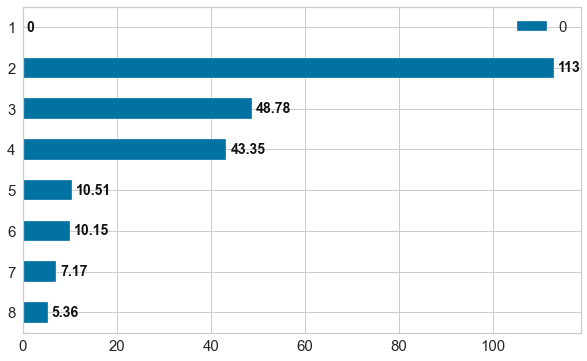

In [891]:
g = df_diff.round(2).plot.barh(rot=0, figsize=(10,6))
g.bar_label(g.containers[0], fontsize=14, weight='bold', color='k', padding=4)
g.invert_yaxis()
plt.show();

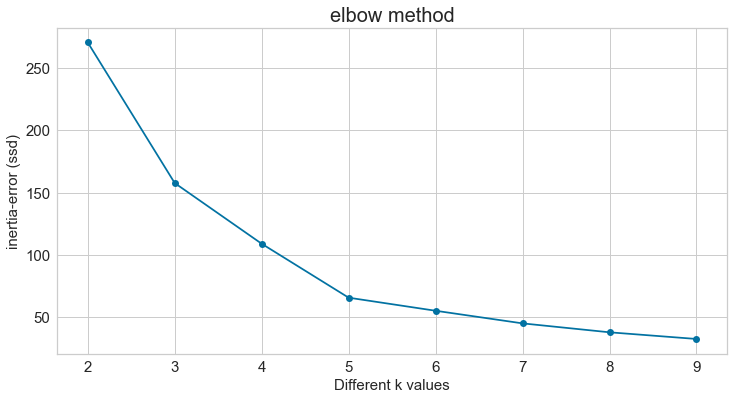

In [892]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")
plt.show()

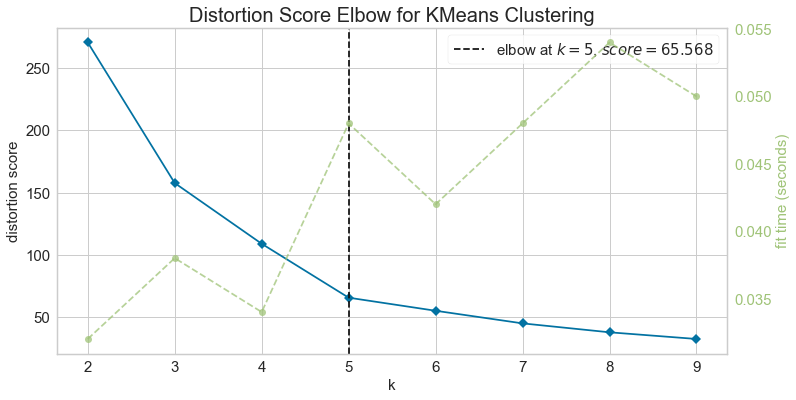

In [893]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

### Silhouette analysis

In [894]:
from sklearn.metrics import silhouette_score

In [895]:
silhouette_score(X, K_means_model.labels_)

0.4558438123118706

In [896]:
for k in K:
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")
    
# The closer it is to 1, the more suitable for clustering.
# Distance within and between clusters
# Since 5 has a higher score, we choose 5 (higher than default number of clusters, 8) and we make our decision clear.

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.49390692375131984
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790662
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.4558438123118706
For n_clusters=9, the silhouette score is 0.4553215994982209


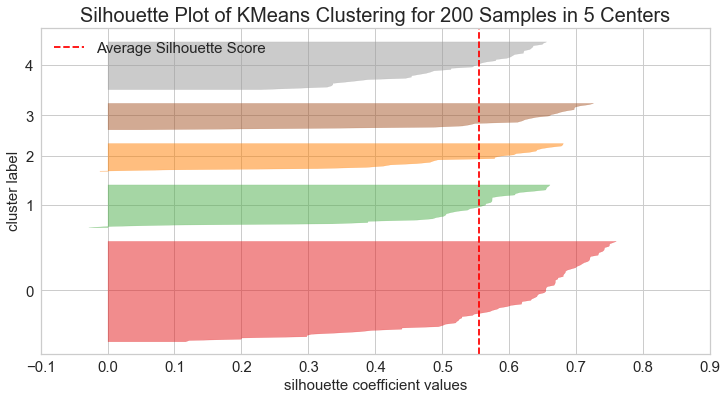

In [897]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

###  Apply K Means*: Building the model based on the optimal number of clusters

In [898]:
kmeans_model = KMeans(n_clusters =5, random_state=42)
kmeans_model.fit_predict(X)  

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

### *iv. Visualizing and Labeling All the Clusters*

In [899]:
kmeans_model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [900]:
kmeans_model.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

In [901]:
X["predicted_clusters"] = kmeans_model.labels_
X["predicted_clusters"].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: predicted_clusters, dtype: int64

In [902]:
X.head()

,annual_income_k_$,spending_score_1_100,predicted_clusters
CustomerID,,,
1,-1.738999,-0.434801,2
2,-1.738999,1.195704,3
3,-1.700830,-1.715913,2
4,-1.700830,1.040418,3
5,-1.662660,-0.395980,2


In [903]:
X.columns

Index(['annual_income_k_$', 'spending_score_1_100', 'predicted_clusters'], dtype='object')

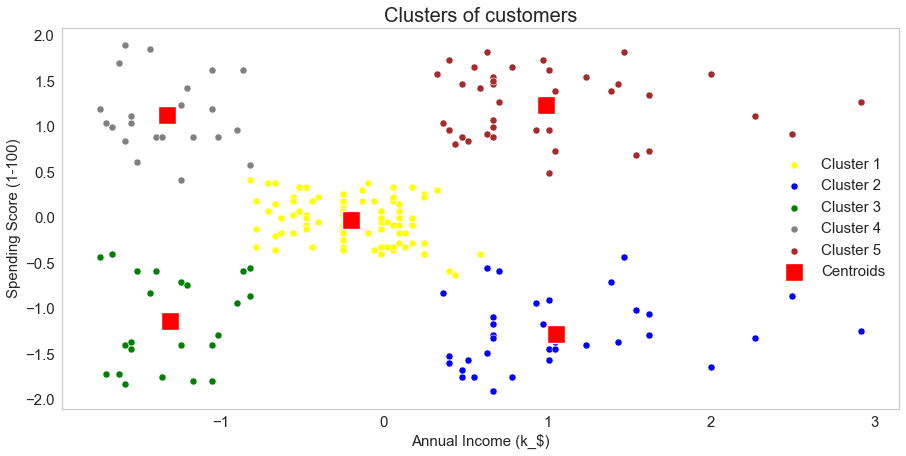

In [904]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X.iloc[kmeans_model.labels_ == 0, 0], X.iloc[kmeans_model.labels_ == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 1, 0], X.iloc[kmeans_model.labels_ == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 2, 0], X.iloc[kmeans_model.labels_ == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 3, 0], X.iloc[kmeans_model.labels_ == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X.iloc[kmeans_model.labels_ == 4, 0], X.iloc[kmeans_model.labels_ == 4, 1], color = 'brown', label = 'Cluster 5',s=50)

sns.scatterplot(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k_$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

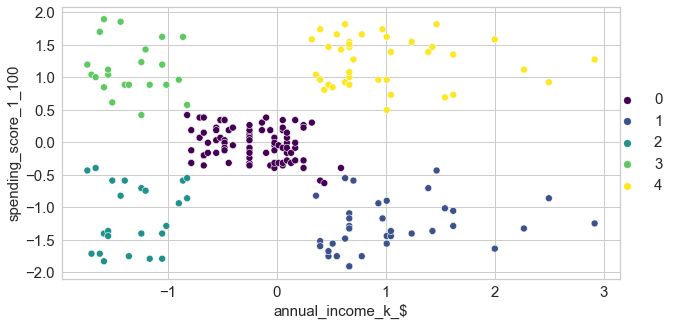

In [905]:
plt.figure(figsize=(10,5))
sns.scatterplot(X['annual_income_k_$'], X["spending_score_1_100"], hue= X["predicted_clusters"], palette= "viridis")
plt.legend(loc="center right", bbox_to_anchor=(1.1,0.5))
plt.show();

In [906]:
# plt.figure(figsize=(10,5))

# sns.scatterplot(
#     x='annual_income_k_$', y="spending_score_1_100", 
#     data=X, 
#     hue= "predicted_clusters", 
#     palette= "viridis", 
#     label='predicted_clusters'
# )
# plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='s', c="r", label='Centroids')
# plt.legend(loc="center right", bbox_to_anchor=(1.25, 0.5))
# plt.show();

In [907]:
clus_pred = X.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2,3,4
annual_income_k_$,-0.200913,1.055003,-1.307519,-1.329545,0.991583
spending_score_1_100,-0.026456,-1.284439,-1.136965,1.132178,1.239503


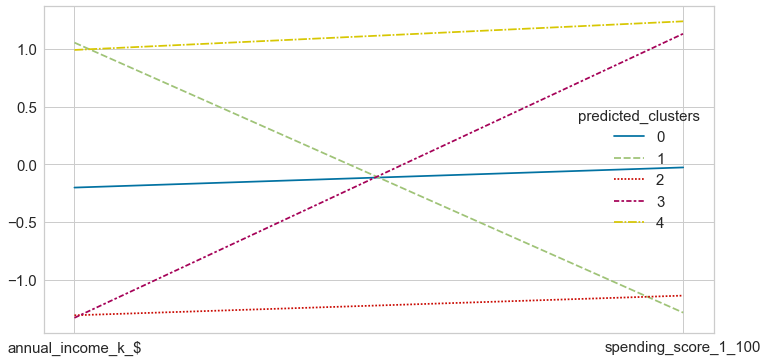

In [908]:
sns.lineplot(data=clus_pred)
plt.show();

> As a result of K-means cluster analysis, when we examine the scatter plot and line plots, we see that the 'annual_income(k_$)' and 'spending_score(1_100)' features make a much better grouping. Therefore, we can determine the labeling according to these two features as follows:

In [909]:
X["labels"] = X['predicted_clusters'].map({
    0:"medium_income_medium_spending",
    1:"high_income_low_spending",
    2:"low_income_low_spending",
    3:"low_income_high_spending",
    4:"high_income_high_spending"
})
X

,annual_income_k_$,spending_score_1_100,predicted_clusters,labels
CustomerID,,,,
1,-1.738999,-0.434801,2,low_income_low_spending
2,-1.738999,1.195704,3,low_income_high_spending
3,-1.700830,-1.715913,2,low_income_low_spending
4,-1.700830,1.040418,3,low_income_high_spending
5,-1.662660,-0.395980,2,low_income_low_spending
...,...,...,...,...
196,2.268791,1.118061,4,high_income_high_spending
197,2.497807,-0.861839,1,high_income_low_spending
198,2.497807,0.923953,4,high_income_high_spending


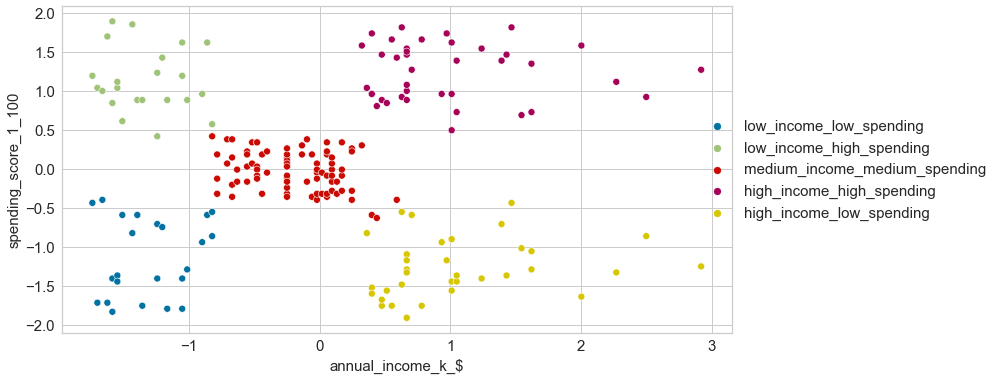

In [910]:
sns.scatterplot(data=X, x="annual_income_k_$", y="spending_score_1_100", hue="labels")
plt.legend(loc="center right", bbox_to_anchor=(1.4,0.5))
plt.show()

# Agglomerative Cluster Analysis (Hierarchical Clustering)¶

In [911]:
df_scaled.head()

,gender,age,annual_income_k_$,spending_score_1_100
CustomerID,,,,
1,Male,-1.424569,-1.738999,-0.434801
2,Male,-1.281035,-1.738999,1.195704
3,Female,-1.352802,-1.700830,-1.715913
4,Female,-1.137502,-1.700830,1.040418
5,Female,-0.563369,-1.662660,-0.395980


## Clustering based on Age and Spending Score - x1

In [912]:
X1 = df_scaled.iloc[:, [1,3]]
X1

,age,spending_score_1_100
CustomerID,,
1,-1.424569,-0.434801
2,-1.281035,1.195704
3,-1.352802,-1.715913
4,-1.137502,1.040418
5,-0.563369,-0.395980
...,...,...
196,-0.276302,1.118061
197,0.441365,-0.861839
198,-0.491602,0.923953


### *i. Determine optimal number of clusters using Dendogram*

In [913]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [914]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

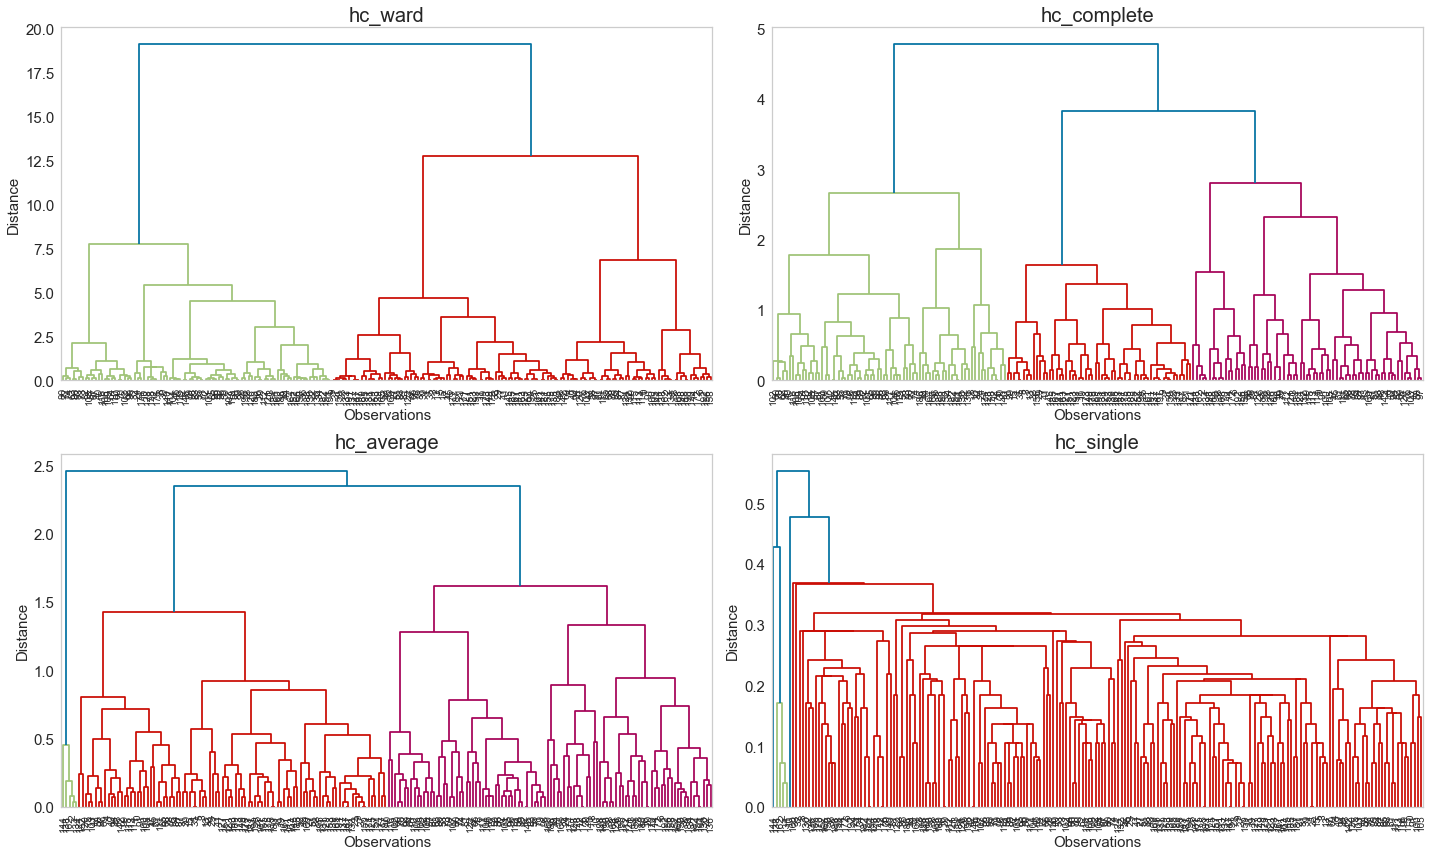

In [915]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']

for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1)     
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(col, leaf_font_size=10)
    plt.tight_layout()

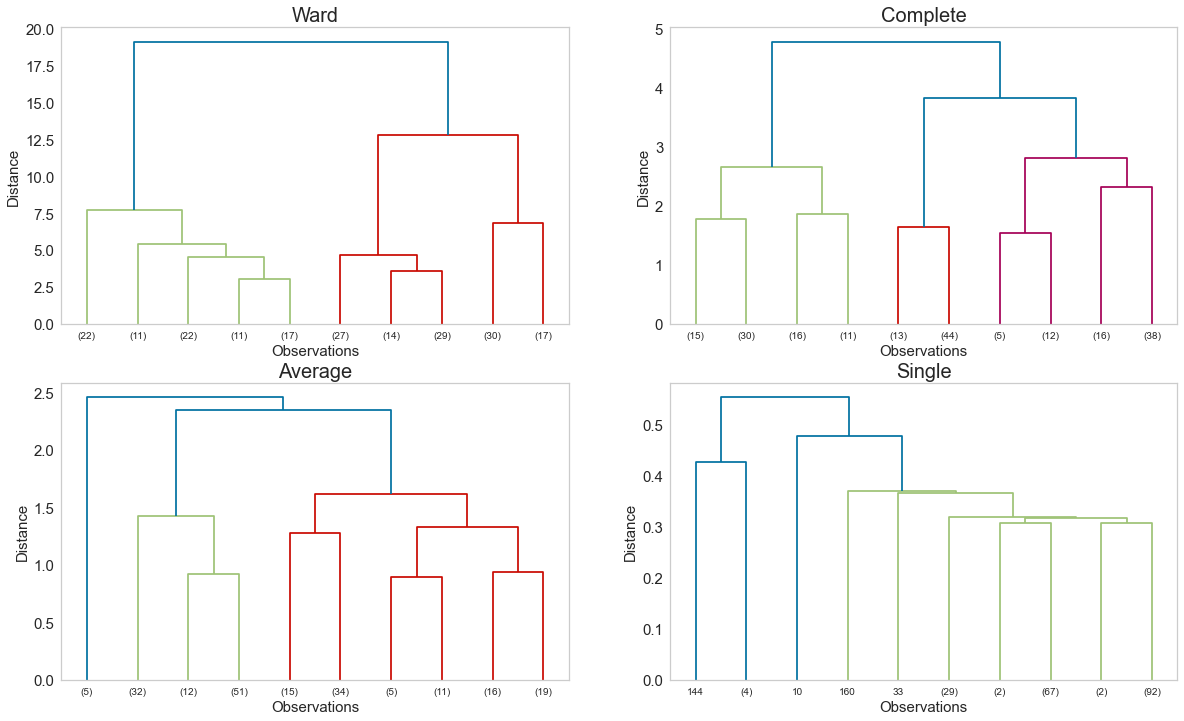

In [916]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

In [917]:
# %matplotlib inline
# from scipy.cluster.hierarchy import linkage, dendrogram
# sns.set_style("whitegrid", {'axes.grid' : False})
# plt.figure(figsize = (20,12))

# for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
#     plt.subplot(2, 2, i+1) 
#     plt.title(f'{scorelist[i]}')
#     plt.xlabel("Observations")
#     plt.ylabel("Distance")
#     # truncate_mode='lastp', p=10(10 küme gösterir)
#     dendrogram(col, leaf_font_size=10, truncate_mode='lastp', p=10)
#     plt.tight_layout()

 2, 4, 3, and 2 clusters have been formed by using ward, complete, average, and single, respectively. 

### ii. *Apply Agglomerative Clustering*  Age and Spending Score- x1

In [918]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.41449964268750605
Silhouette Score for 3 clusters: 0.41664148520309086
Silhouette Score for 4 clusters: 0.38927004893456446
Silhouette Score for 5 clusters: 0.37645541279421835
Silhouette Score for 6 clusters: 0.3990690566531424
Silhouette Score for 7 clusters: 0.35860467835702076
Silhouette Score for 8 clusters: 0.36108128331910777
Silhouette Score for 9 clusters: 0.36590837496814105


## Clustering based on Annual Income and Spending Score - x2

In [919]:
X2 = df_scaled.iloc[:, [2,3]]
X2

,annual_income_k_$,spending_score_1_100
CustomerID,,
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980
...,...,...
196,2.268791,1.118061
197,2.497807,-0.861839
198,2.497807,0.923953


### i. Dendogram - Determine optimal number of clusters

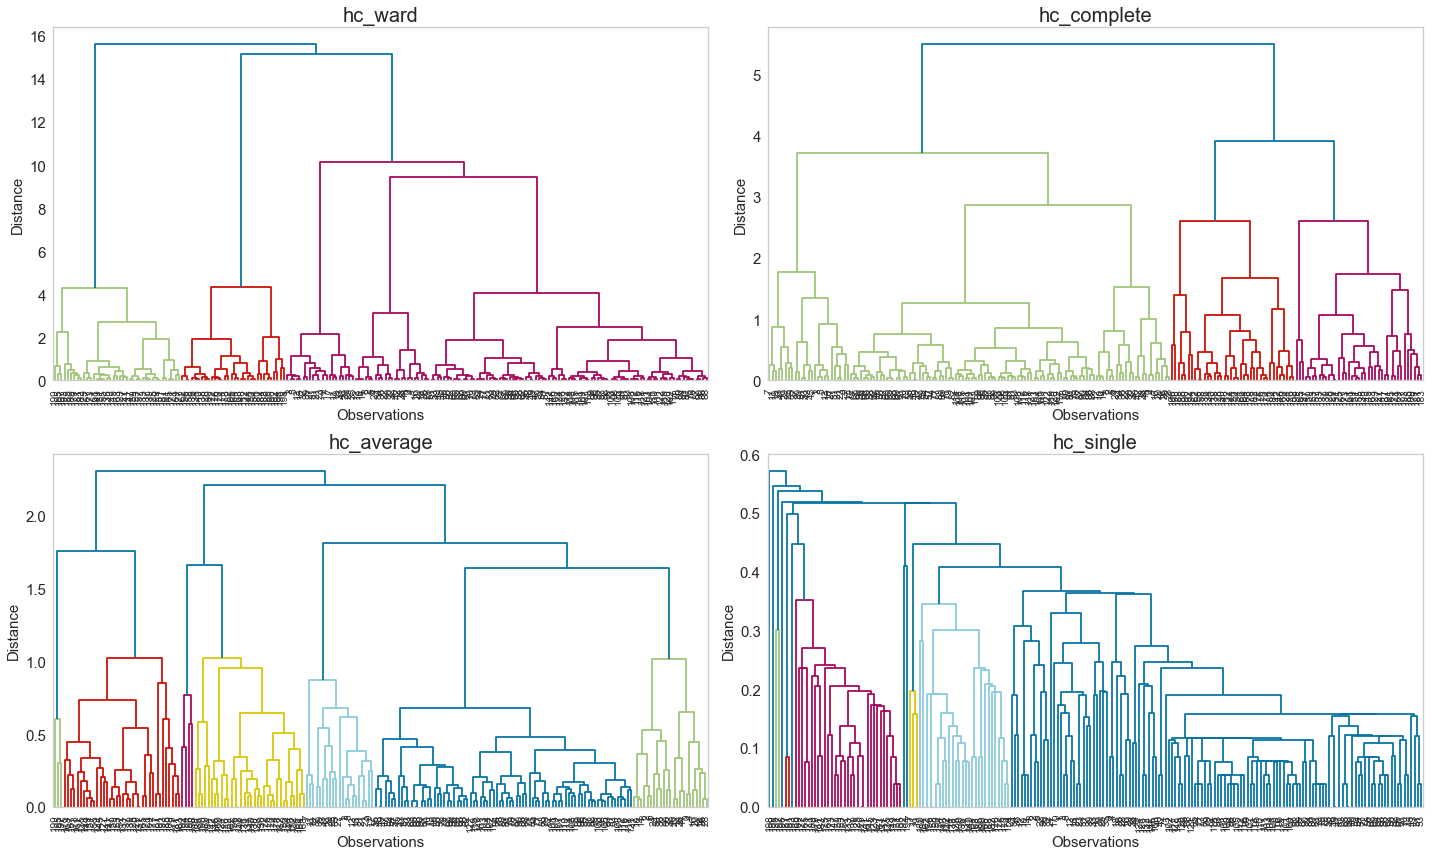

In [920]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

hc_ward     = linkage(y=X2, method="ward")
hc_complete = linkage(X2, "complete") 
hc_average  = linkage(X2, "average")
hc_single   = linkage(X2, "single")

scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']

for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1)     
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(col, leaf_font_size=10)
    plt.tight_layout()

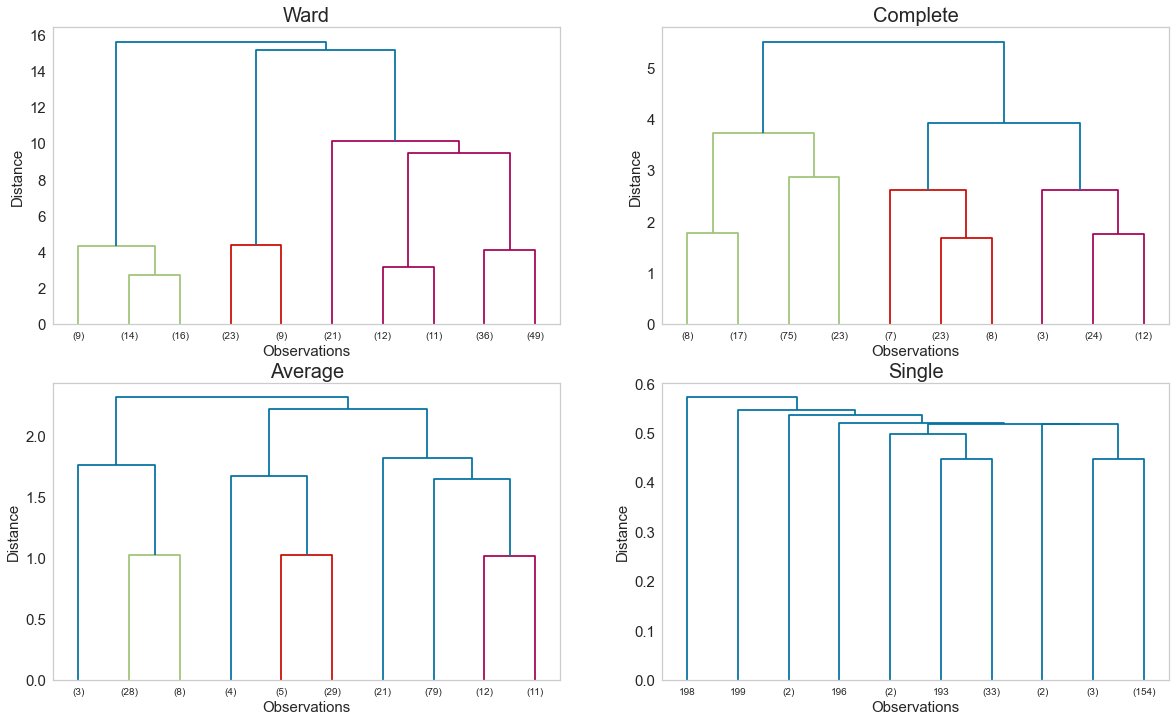

In [921]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

In [922]:
# %matplotlib inline
# sns.set_style("whitegrid", {'axes.grid' : False})
# plt.figure(figsize = (20,12))

# for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
#     plt.subplot(2, 2, i+1) 
#     plt.title(f'{scorelist[i]}')
#     plt.xlabel("Observations")
#     plt.ylabel("Distance")
#     # truncate_mode='lastp', p=10(10 küme gösterir)
#     dendrogram(col, leaf_font_size=10, truncate_mode='lastp', p=10)
#     plt.tight_layout()

### ii. *Apply Agglomerative Clustering*  Annual Income and Spending Score - x2

In [923]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.3842337621772662
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475768
Silhouette Score for 8 clusters: 0.4308617778221773
Silhouette Score for 9 clusters: 0.43768997758154127


## iii. *Visualizing and Labeling All the Clusters* 

### Age and Spending Score- x1

In [924]:
model1 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
model1.fit(X1)
model1.labels_
X1['labels'] = model1.labels_
X1

,age,spending_score_1_100,labels
CustomerID,,,
1,-1.424569,-0.434801,1
2,-1.281035,1.195704,2
3,-1.352802,-1.715913,1
4,-1.137502,1.040418,2
5,-0.563369,-0.395980,1
...,...,...,...
196,-0.276302,1.118061,2
197,0.441365,-0.861839,0
198,-0.491602,0.923953,2


In [925]:
X1.labels.value_counts()

0    83
2    70
1    47
Name: labels, dtype: int64

In [926]:
X1.groupby("labels").age.mean()

labels
0    0.985236
1   -0.894717
2   -0.567469
Name: age, dtype: float64

In [927]:
# plt.figure(figsize = (20,18))
# plot_number = 1
# for i in X1:
#     for j in X1:
#         if j!=i:
#             plt.subplot(2,3,plot_number)
#             plt.scatter(X1[j], X1[i], c =X1['labels'], cmap = "viridis")
#             plt.xlabel(j)
#             plt.ylabel(i)
#             plot_number += 1

Text(0.5, 1.0, 'Predicted Clusters')

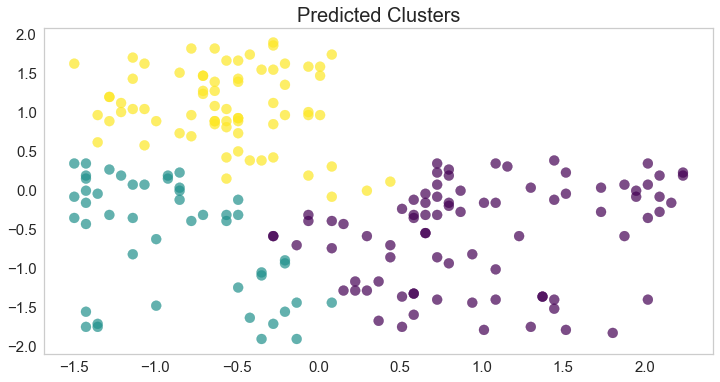

In [928]:
plt.figure(figsize=(12,6))
plt.scatter(X1["age"], X1["spending_score_1_100"], c=X1['labels'], cmap="viridis", alpha=0.7, s=100)
plt.title("Predicted Clusters")

### Annual Income and Spending Score- x2

In [929]:
model2 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
model2.fit(X2)
model2.labels_
X2['labels'] = model2.labels_
X2

,annual_income_k_$,spending_score_1_100,labels
CustomerID,,,
1,-1.738999,-0.434801,4
2,-1.738999,1.195704,3
3,-1.700830,-1.715913,4
4,-1.700830,1.040418,3
5,-1.662660,-0.395980,4
...,...,...,...
196,2.268791,1.118061,1
197,2.497807,-0.861839,0
198,2.497807,0.923953,1


Text(0.5, 1.0, 'Predicted Clusters')

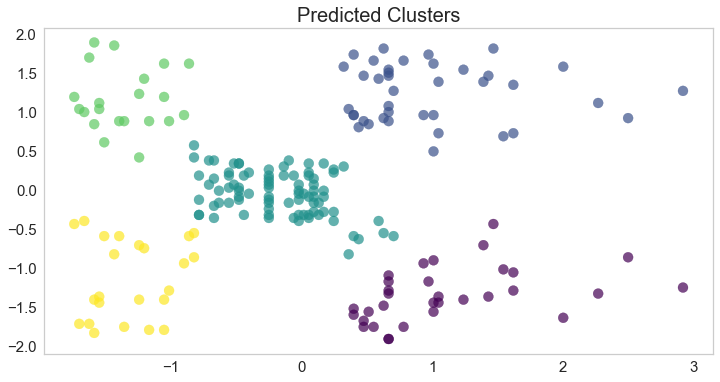

In [930]:
plt.figure(figsize=(12,6))
plt.scatter(X2["annual_income_k_$"], X2["spending_score_1_100"], c=X2['labels'], cmap="viridis", alpha=0.7, s=100)
plt.title("Predicted Clusters")

## Visualizing Interpretation

### Interpretation based on Age and Spending Score- x1

In [931]:
clus_pred = X1.groupby("labels").mean().T
clus_pred

labels,0,1,2
age,0.985236,-0.894717,-0.567469
spending_score_1_100,-0.565298,-0.599174,1.072584


<AxesSubplot:>

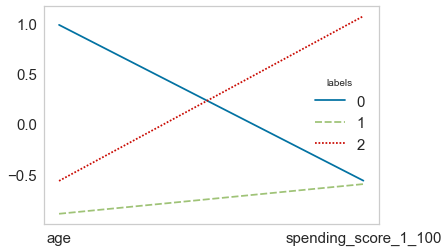

In [932]:
sns.lineplot(data=clus_pred)

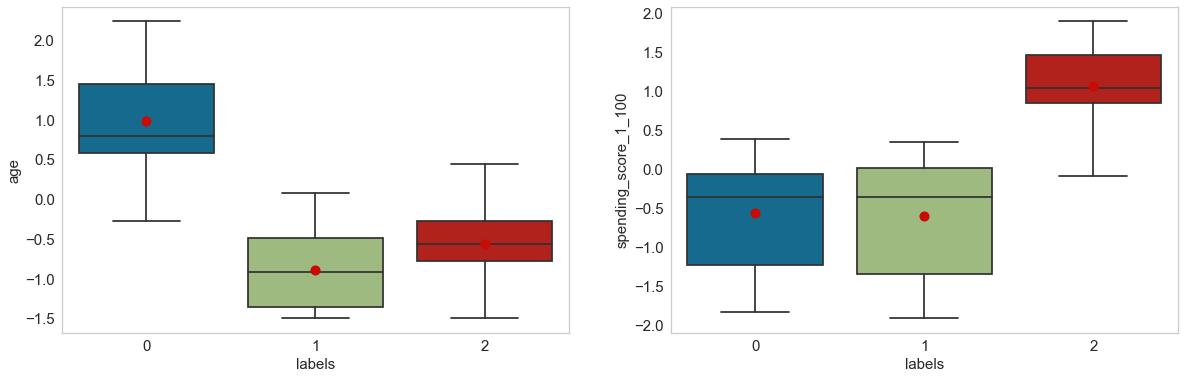

In [933]:
plt.figure(figsize = (20,6))

plt.subplot(121)
sns.boxplot(y = 'age', x = "labels", data = X1)

plt.subplot(122)
sns.boxplot(y = 'spending_score_1_100', x = "labels", data = X1)

plt.show()

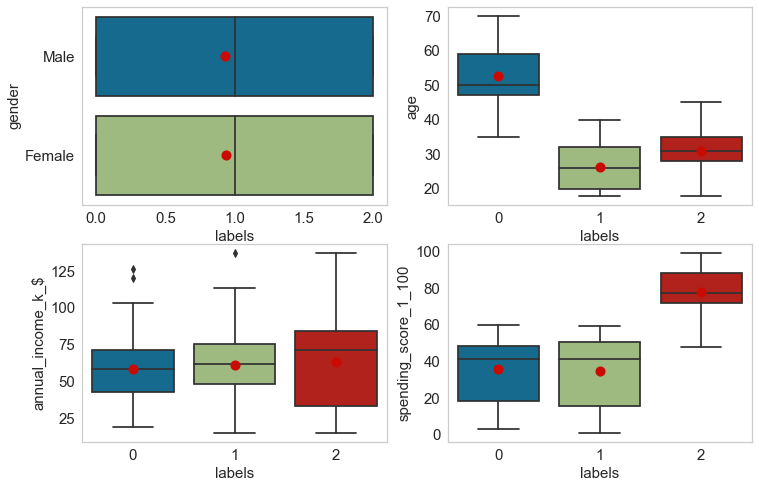

In [938]:
plt.figure(figsize=(12,8))

for i, col in enumerate(df_not_scaled.drop(columns="labels_X1").columns):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x=X1['labels'], y=col, data=df_not_scaled.drop(columns="labels_X1"))

In [935]:
df_not_scaled["labels_X1"] = X1['labels'] 

In [936]:
clus_pred_df = df_not_scaled.groupby("labels_X1").mean().T
clus_pred_df

labels_X1,0,1,2
age,52.578313,26.382979,30.942857
annual_income_k_$,58.204819,61.255319,62.885714
spending_score_1_100,35.638554,34.765957,77.828571


In [954]:
df_not_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.850,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income_k_$,200.0,60.560,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score_1_100,200.0,50.200,25.823522,1.0,34.75,50.0,73.0,99.0
labels_X1,200.0,0.935,0.874413,0.0,0.00,1.0,2.0,2.0
labels_X2,200.0,1.820,1.172379,0.0,1.00,2.0,2.0,4.0


#### Conclusion

**cluster 0** : The average age is around 52, the age is high, their annual income is low but their spending_score is low. It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 26, the age is low, their annual income is medium but their spending_score is low. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 30, the age is medium, their annual income is high but their spending_score is very high. It can be directed to shopping with gift certificates.

### Interpretation based on Annual Income and Spending Score- x2

In [939]:
clus_pred = X2.groupby("labels").mean().T
clus_pred

labels,0,1,2,3,4
annual_income_k_$,1.101045,0.991583,-0.181237,-1.353670,-1.307519
spending_score_1_100,-1.343469,1.239503,-0.041562,1.158731,-1.136965


<AxesSubplot:>

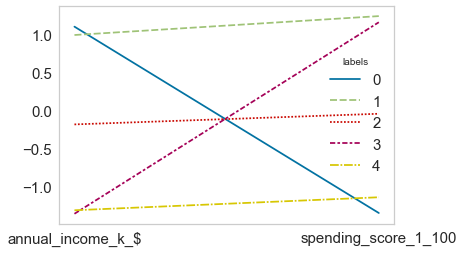

In [940]:
sns.lineplot(data=clus_pred)

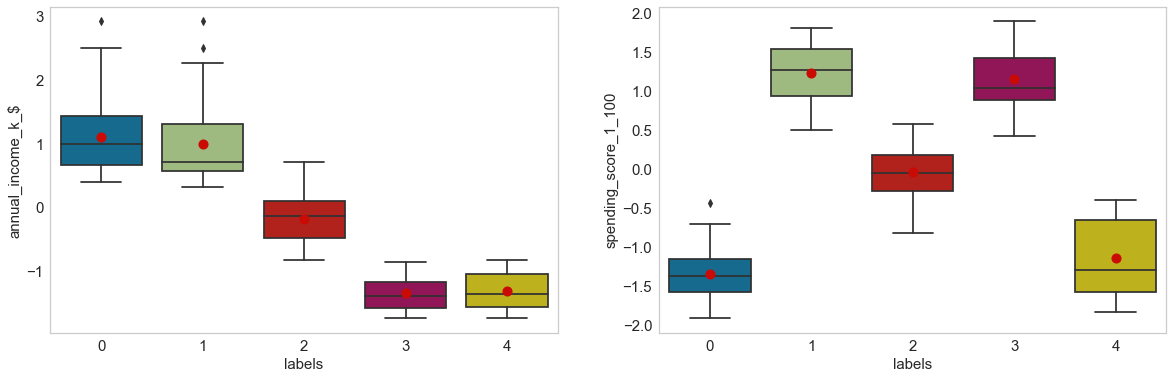

In [941]:
plt.figure(figsize = (20,6))

plt.subplot(121)
sns.boxplot(y = 'annual_income_k_$', x = "labels", data = X2)

plt.subplot(122)
sns.boxplot(y = 'spending_score_1_100', x = "labels", data = X2)

plt.show()

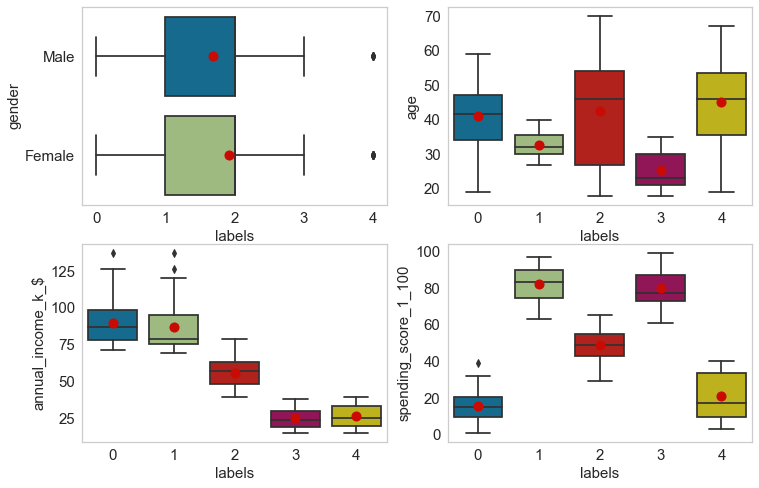

In [945]:
plt.figure(figsize=(12,8))

for i, col in enumerate(df_not_scaled.drop(columns=["labels_X1","labels_X2"]).columns):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x=X2['labels'], y=col, data=df_not_scaled.drop(columns=["labels_X1","labels_X2"]))

In [958]:
clus_pred_X2 = df_not_scaled.groupby("labels_X2").mean().T
clus_pred_X2

labels_X2,0,1,2,3,4
age,41.00000,32.692308,42.482353,25.333333,45.217391
annual_income_k_$,89.40625,86.538462,55.811765,25.095238,26.304348
spending_score_1_100,15.59375,82.128205,49.129412,80.047619,20.913043
labels_X1,0.40625,2.000000,0.564706,2.000000,0.260870


In [959]:
df_not_scaled.describe()

,age,annual_income_k_$,spending_score_1_100,labels_X1,labels_X2
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.935000,1.820000
std,13.969007,26.264721,25.823522,0.874413,1.172379
min,18.000000,15.000000,1.000000,0.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000,1.000000
50%,36.000000,61.500000,50.000000,1.000000,2.000000
75%,49.000000,78.000000,73.000000,2.000000,2.000000
max,70.000000,137.000000,99.000000,2.000000,4.000000


#### Conclusion

**cluster 0** : The average age is around 40, their annual income is very high but their spending_score is very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 1**: The average age is around 32, both annula_income and spending_scores are very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it. 


**cluster 2** :The average age is around 42, both annula_income and spending_scores are average. It should be researched what can be done to direct to more spending.

**cluster 3**: The average age is around 25, both annula_income is very low and spending_scores is very high .  This 
group does a lot of shopping, but they do not bring much profit.
It can be directed to shopping with gift certificates.

**cluster 4**: The average age is around 25,  both annula_income and spending_scores are on very low. It can be directed to shopping with gift certificates.

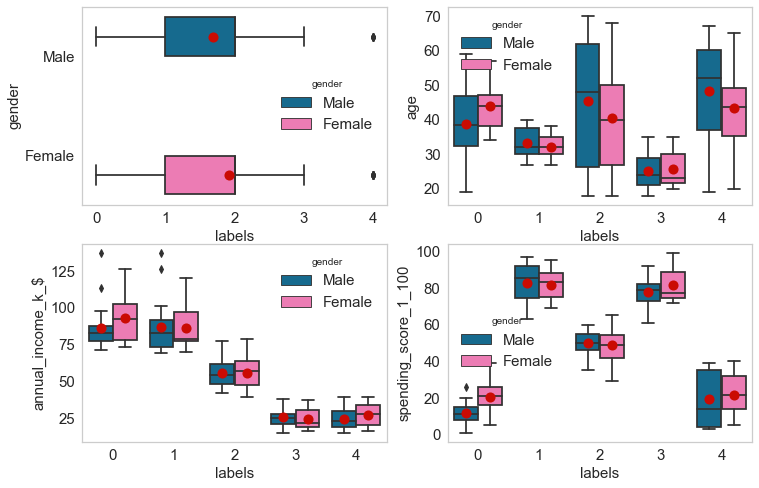

In [952]:
plt.figure(figsize=(12,8))

for i, col in enumerate(df_not_scaled.drop(columns=["labels_X1","labels_X2"]).columns):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x=X2['labels'], y=col, data=df_not_scaled.drop(columns=["labels_X1","labels_X2"]), hue=df['gender'], palette=['b', 'hotpink'])

In [968]:
df_not_scaled.groupby(["gender","labels_X2"]).mean()

age  annual_income_k_$  spending_score_1_100  \
gender labels_X2                                                       
Female 0          43.785714          93.285714             20.642857   
       1          32.190476          86.047619             81.666667   
       2          40.509804          55.784314             48.647059   
       3          25.583333          24.583333             81.833333   
       4          43.214286          27.357143             21.714286   
Male   0          38.833333          86.388889             11.666667   
       1          33.277778          87.111111             82.666667   
       2          45.441176          55.852941             49.852941   
       3          25.000000          25.777778             77.666667   
       4          48.333333          24.666667             19.666667   

                  labels_X1  
gender labels_X2             
Female 0           0.214286  
       1           2.000000  
       2           0.627451  
       3           2.000000  
       4           0.285714  
Male   0           0.555556  
       1           2.000000  
       2           0.470588  
       3           2.000000  
       4           0.222222

In [982]:
df_not_scaled.iloc[:,:4].groupby(["gender"]).describe()

age                                                       \
        count       mean        std   min    25%   50%   75%   max   
gender                                                               
Female  112.0  38.098214  12.644095  18.0  29.00  35.0  47.5  68.0   
Male     88.0  39.806818  15.514812  18.0  27.75  37.0  50.5  70.0   

       annual_income_k_$                                                  \
                   count       mean        std   min    25%   50%    75%   
gender                                                                     
Female             112.0  59.250000  26.011952  16.0  39.75  60.0  77.25   
Male                88.0  62.227273  26.638373  15.0  45.50  62.5  78.00   

              spending_score_1_100                                        \
          max                count       mean       std  min   25%   50%   
gender                                                                     
Female  126.0                112.0  51.526786  24.11495  5.0  35.0  50.0   
Male    137.0                 88.0  48.511364  27.89677  1.0  24.5  50.0   

                    
         75%   max  
gender              
Female  73.0  99.0  
Male    70.0  97.0

## Conclusion

### Female

**cluster 0** : The average age is around 44, their annual income is very high but their spending_score is very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 1**: The average age is around 32, both annula_income and spending_scores are very high . This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it. 

**cluster 2** :The average age is around 40, both annula_income and spending_scores are average. It should be researched what can be done to direct to more spending.

**cluster 3**: The average age is around 25,their annual income is very low but their spending_score is very high. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 43, both annula_income and spending_scores are on very low. It can be directed to shopping with gift certificates.

### Male

**cluster 0** : The average age is around 38, their annual income is very high but their spending_score is very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 1**: The average age is around 32, both annula_income and spending_scores are on very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it. 

**cluster 2** :The average age is around 40, both annula_income and spending_scores are average. It should be researched what can be done to direct to more spending.

**cluster 3**: The average age is around 25,their annual income is very low but their spending_score is very high. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 48, their annual income and their spending_score are very low. It can be directed to shopping with gift certificates.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___